### House Price Predection :

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [27]:
data=pd.read_csv("House Price Prediction Dataset.csv")

Some information about the data :

In [28]:
data

Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Location  Condition  \
0        1  1360         5          4       3       1970  Downtown  Excellent   
1        2  4272         5          4       3       1958  Downtown  Excellent   
2        3  3592         2          2       3       1938  Downtown       Good   
3        4   966         4          2       2       1902  Suburban       Fair   
4        5  4926         1          4       2       1975  Downtown       Fair   
5        6  3944         1          2       1       1906     Urban       Poor   
6        7  3671         1          1       2       1948     Rural       Poor   
7        8  3419         2          4       1       1925  Suburban       Good   
8        9   630         2          2       1       1932     Rural       Poor   
9       10  2185         3          3       1       2000  Downtown       Poor   
10      11  1269         1          4       2       1947  Suburban       Poor   
11      12  2891         4          4       3       1978     Urban  Excellent   
12      13  2933         4          3       2       1901  Downtown       Poor   
13      14  1684         1          1       1       2004     Rural       Good   
14      15  3885         1          3       1       1970     Urban       Fair   
15      16  4617         1          4       2       1931  Downtown       Poor   
16      17  3404         2          1       1       1903     Urban       Fair   
17      18   974         2          2       1       1919  Downtown       Poor   
18      19  1582         2          2       2       2013  Suburban       Good   
19      20  3058         5          2       2       2016  Downtown  Excellent   
20      21  2547         4          4       2       1935  Suburban       Good   
21      22  3247         4          3       1       1931  Downtown  Excellent   
22      23  1475         3          1       1       1927  Downtown       Poor   
23      24  2306         2          2       3       1976     Rural       Poor   
24      25   689         5          1       3       1900     Urban  Excellent   
25      26  3234         5          4       2       1959     Urban       Good   
26      27  3505         4          2       3       1955     Urban       Good   
27      28  2399         2          4       1       1934  Downtown  Excellent   
28      29  1767         3          3       3       2011  Downtown       Poor   
29      30  2028         2          4       1       1929  Downtown  Excellent   
30      31  3702         1          4       2       1953  Suburban       Poor   
31      32  4056         2          3       2       1935  Suburban  Excellent   
32      33  4390         1          1       1       2020     Rural       Poor   
33      34  1146         1          3       3       1954  Downtown  Excellent   
34      35  3388         3          3       2       1988     Urban       Fair   
35      36  2935         4          4       2       1979     Urban       Poor   
36      37  1100         2          1       3       1957     Rural       Good   
37      38  2863         1          2       3       1982     Urban  Excellent   
38      39  2561         2          3       1       1964     Rural       Good   
39      40   741         4          1       3       1968  Downtown  Excellent   
40      41  2541         4          3       3       1950     Urban       Good   
41      42  3324         5          3       3       1921  Downtown       Good   
42      43  3112         4          3       1       1987  Suburban  Excellent   
43      44  1863         3          3       1       2006     Urban  Excellent   
44      45  1978         1          4       2       2008  Suburban       Good   
45      46  3056         5          1       1       2015     Urban       Good   
46      47  1275         3          1       2       2000  Downtown       Good   
47      48  4514         2          1       3       1952     Rural       Poor   
48      49   534         1          3  

In [29]:
data.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [30]:
pd.set_option("display.max_rows",None)

In [31]:
sum(data.duplicated())

0

In [32]:
import functools as fn
fn.reduce(lambda x,y:x or y,data.duplicated())

False

In [33]:
data.describe()

Id         Area     Bedrooms   Bathrooms       Floors  \
count  2000.000000  2000.000000  2000.000000  2000.00000  2000.000000   
mean   1000.500000  2786.209500     3.003500     2.55250     1.993500   
std     577.494589  1295.146799     1.424606     1.10899     0.809188   
min       1.000000   501.000000     1.000000     1.00000     1.000000   
25%     500.750000  1653.000000     2.000000     2.00000     1.000000   
50%    1000.500000  2833.000000     3.000000     3.00000     2.000000   
75%    1500.250000  3887.500000     4.000000     4.00000     3.000000   
max    2000.000000  4999.000000     5.000000     4.00000     3.000000   

         YearBuilt          Price  
count  2000.000000    2000.000000  
mean   1961.446000  537676.855000  
std      35.926695  276428.845719  
min    1900.000000   50005.000000  
25%    1930.000000  300098.000000  
50%    1961.000000  539254.000000  
75%    1993.000000  780086.000000  
max    2023.000000  999656.000000

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [35]:
data.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

Our dataset is cleaned and ready for prediction.

Part: Encoding categorical variables :

In [36]:
data= pd.get_dummies(data, columns=['Condition'])

In [37]:
data= pd.get_dummies(data, columns=['Location'])

In [38]:
data['Garage']=data['Garage'].astype('category')
data['Garage']=data['Garage'].cat.codes

In [39]:
bool_cols = data.select_dtypes(include='bool').columns
data[bool_cols] = data[bool_cols].astype(int)


In [40]:
data

Id  Area  Bedrooms  Bathrooms  Floors  YearBuilt  Garage   Price  \
0        1  1360         5          4       3       1970       0  149919   
1        2  4272         5          4       3       1958       0  424998   
2        3  3592         2          2       3       1938       0  266746   
3        4   966         4          2       2       1902       1  244020   
4        5  4926         1          4       2       1975       1  636056   
5        6  3944         1          2       1       1906       0   93262   
6        7  3671         1          1       2       1948       1  448722   
7        8  3419         2          4       1       1925       1  594893   
8        9   630         2          2       1       1932       1  652878   
9       10  2185         3          3       1       2000       0  340375   
10      11  1269         1          4       2       1947       1  653685   
11      12  2891         4          4       3       1978       1  127123   
12      13  2933         4          3       2       1901       0  849947   
13      14  1684         1          1       1       2004       0  399355   
14      15  3885         1          3       1       1970       1  481838   
15      16  4617         1          4       2       1931       0  853032   
16      17  3404         2          1       1       1903       1  208964   
17      18   974         2          2       1       1919       1  905742   
18      19  1582         2          2       2       2013       0  989305   
19      20  3058         5          2       2       2016       0  218767   
20      21  2547         4          4       2       1935       1  996357   
21      22  3247         4          3       1       1931       0  709789   
22      23  1475         3          1       1       1927       0  709966   
23      24  2306         2          2       3       1976       1  447694   
24      25   689         5          1       3       1900       1  688668   
25      26  3234         5          4       2       1959       1  527032   
26      27  3505         4          2       3       1955       1  745494   
27      28  2399         2          4       1       1934       1  513179   
28      29  1767         3          3       3       2011       1  948212   
29      30  2028         2          4       1       1929       0  206547   
30      31  3702         1          4       2       1953       0  902609   
31      32  4056         2          3       2       1935       1  727090   
32      33  4390         1          1       1       2020       0  202185   
33      34  1146         1          3       3       1954       0  725371   
34      35  3388         3          3       2       1988       1  105746   
35      36  2935         4          4       2       1979       0  959507   
36      37  1100         2          1       3       1957       0  748213   
37      38  2863         1          2       3       1982       1  921627   
38      39  2561         2          3       1       1964       0  873250   
39      40   741         4          1       3       1968       0  218393   
40      41  2541         4          3       3       1950       1  333453   
41      42  3324         5          3       3       1921       0  986192   
42      43  3112         4          3       1       1987       0  340320   
43      44  1863         3          3       1       2006       0  643167   
44      45  1978         1          4       2       2008       1  641880   
45      46  3056         5          1       1       2015       1  396872   
46      47  1275         3          1       2       2000       0  270084   
47      48  4514         2          1       3       1952       0  976920   
48      49   534         1          3       2       1999       1  771782   
49      50  3652         4          4       2       1935       1  845016   
50      51  2455         1          3       3       1967       0  698843   
51      52  2085         2          3       2       1935

Prediction phase :

Now we are going to predict the house price based on the following features: Area, Bedrooms, Bathrooms, Floors, Year Built, Location, Condition, and Garage.

So we need to create one variable that contains all these features and another variable that contains the corresponding price for each entry :

In [41]:
#variable that contains all the features
X=data.drop(['Id','Price'],axis=1)

In [42]:
X

Area  Bedrooms  Bathrooms  Floors  YearBuilt  Garage  \
0     1360         5          4       3       1970       0   
1     4272         5          4       3       1958       0   
2     3592         2          2       3       1938       0   
3      966         4          2       2       1902       1   
4     4926         1          4       2       1975       1   
5     3944         1          2       1       1906       0   
6     3671         1          1       2       1948       1   
7     3419         2          4       1       1925       1   
8      630         2          2       1       1932       1   
9     2185         3          3       1       2000       0   
10    1269         1          4       2       1947       1   
11    2891         4          4       3       1978       1   
12    2933         4          3       2       1901       0   
13    1684         1          1       1       2004       0   
14    3885         1          3       1       1970       1   
15    4617         1          4       2       1931       0   
16    3404         2          1       1       1903       1   
17     974         2          2       1       1919       1   
18    1582         2          2       2       2013       0   
19    3058         5          2       2       2016       0   
20    2547         4          4       2       1935       1   
21    3247         4          3       1       1931       0   
22    1475         3          1       1       1927       0   
23    2306         2          2       3       1976       1   
24     689         5          1       3       1900       1   
25    3234         5          4       2       1959       1   
26    3505         4          2       3       1955       1   
27    2399         2          4       1       1934       1   
28    1767         3          3       3       2011       1   
29    2028         2          4       1       1929       0   
30    3702         1          4       2       1953       0   
31    4056         2          3       2       1935       1   
32    4390         1          1       1       2020       0   
33    1146         1          3       3       1954       0   
34    3388         3          3       2       1988       1   
35    2935         4          4       2       1979       0   
36    1100         2          1       3       1957       0   
37    2863         1          2       3       1982       1   
38    2561         2          3       1       1964       0   
39     741         4          1       3       1968       0   
40    2541         4          3       3       1950       1   
41    3324         5          3       3       1921       0   
42    3112         4          3       1       1987       0   
43    1863         3          3       1       2006       0   
44    1978         1          4       2       2008       1   
45    3056         5          1       1       2015       1   
46    1275         3          1       2       2000       0   
47    4514         2          1       3       1952       0   
48     534         1          3       2       1999       1   
49    3652         4          4       2       1935       1   
50    2455         1          3       3       1967       0   
51    2085         2          3       2       1935       1   
52    4443         5          1       1       1951       0   
53    3573         5          3       1       1952       0   
54    1521         5          2       1       1981       1   
55    3961         4          3       1       1949       1   
56    3113         3          2       2       1979       0   
57    4343         3          3       2       1940       0   
58    2000         1          4       3       1917       1   
59     661         4          4       2       1921       0   
60    4797         5          1       2       1965       1   
61    2481         5          3       2       1920       1   
62    1495         2          2       3       1999       1   
63    3842         2          2       

In [43]:
#variable that contains the corresponding price for each entry
Y=data['Price']

In [44]:
Y

0       149919
1       424998
2       266746
3       244020
4       636056
5        93262
6       448722
7       594893
8       652878
9       340375
10      653685
11      127123
12      849947
13      399355
14      481838
15      853032
16      208964
17      905742
18      989305
19      218767
20      996357
21      709789
22      709966
23      447694
24      688668
25      527032
26      745494
27      513179
28      948212
29      206547
30      902609
31      727090
32      202185
33      725371
34      105746
35      959507
36      748213
37      921627
38      873250
39      218393
40      333453
41      986192
42      340320
43      643167
44      641880
45      396872
46      270084
47      976920
48      771782
49      845016
50      698843
51      405446
52      958840
53      593118
54      266897
55      826522
56      913498
57      840023
58      143878
59      175407
60      691157
61      307716
62      857827
63       66738
64      183703
65      723265
66      59

Now we should split our data into 80% for training and 20% for testing. For this, we will use the function below :

In [45]:
Y.describe()

count      2000.000000
mean     537676.855000
std      276428.845719
min       50005.000000
25%      300098.000000
50%      539254.000000
75%      780086.000000
max      999656.000000
Name: Price, dtype: float64

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [48]:
upper_limit = Y.quantile(0.99)  # remove top 1%
mask = Y < upper_limit
X = X.loc[mask]
Y = Y.loc[mask]


Building our model :

In [49]:
#import linear regression model :
from sklearn.linear_model import LinearRegression

#create the model
model = LinearRegression()

#Train the model using our dataset for tarining
model.fit(X_train,Y_train)

LinearRegression()

Now with the model trained, we can now test it and check the prediction accuracy

In [50]:
#Trying to predict on our test data.

Y_pred= model.predict(X_test)

In [51]:
Y_pred

array([521988.22189839, 549119.31196651, 487101.22235594, 539752.7439933 ,
       553242.24872512, 521375.92025826, 523320.18080583, 578133.64353335,
       545899.64738458, 577368.69940644, 549359.90237922, 583802.8656311 ,
       511024.20843161, 527181.17287186, 502178.93122353, 563657.42139779,
       533851.47058016, 557566.45545641, 578893.4890812 , 522197.01288502,
       535945.37429884, 520333.81440515, 520145.76012635, 589984.6964629 ,
       570910.91251258, 530657.68307139, 524849.79926253, 533833.03412407,
       517535.08657939, 489462.64631857, 471135.44970754, 532885.36922583,
       559703.53345149, 566918.76753933, 505186.85760171, 504126.65238569,
       566525.93875815, 587039.42913431, 533334.54147469, 503067.97932305,
       488794.10065586, 540580.91705316, 538165.7543287 , 538208.1073811 ,
       539782.8193264 , 574195.17961934, 551957.63060142, 537147.22385255,
       531554.19942009, 528480.27403638, 515181.27688738, 549393.77262824,
       567112.62323004, 5

In [52]:
from sklearn.metrics import r2_score

In [53]:
model.score(X_test,Y_test)

-0.006717808430749761

In [54]:
r2_score(Y_test,Y_pred )

-0.006717808430749761

Now with the model trained, we can now test it and check the prediction accuracy

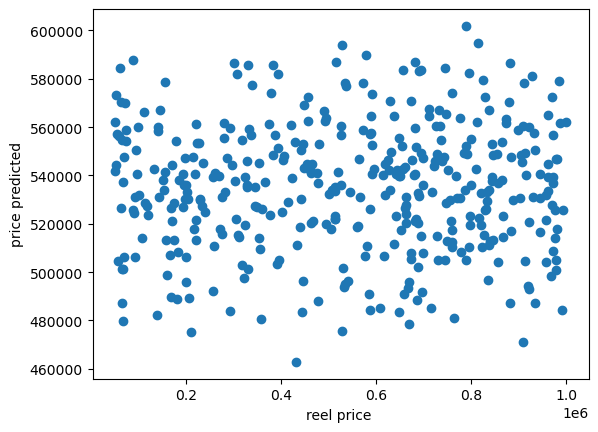

In [55]:
plt.scatter(Y_test,Y_pred)
plt.xlabel("reel price ")
plt.ylabel("price predicted")
plt.show()